<a href="https://colab.research.google.com/github/Wolfinmoon/telecomX_pt-2/blob/main/TelecomX_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carregamento e Limpeza

In [2]:
try:
    df = pd.read_csv('TelecomX_Dataset_Transformado.csv')
    print("Arquivo carregado com sucesso!")

    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    if 'customerID' in df.columns:
        df.drop('customerID', axis=1, inplace=True)

    print("Colunas de ID removidas. Visualizando os dados:")
    display(df.head())

except FileNotFoundError:
    print("ERRO: O arquivo 'TelecomX_Dataset_Transformado.csv' não foi encontrado.")

Arquivo carregado com sucesso!
Colunas de ID removidas. Visualizando os dados:


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Análise da Proporção de Evasão (Churn)

Proporção de Churn no dataset (%):
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-3-2858939989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=['#4CAF50', '#F44336'])


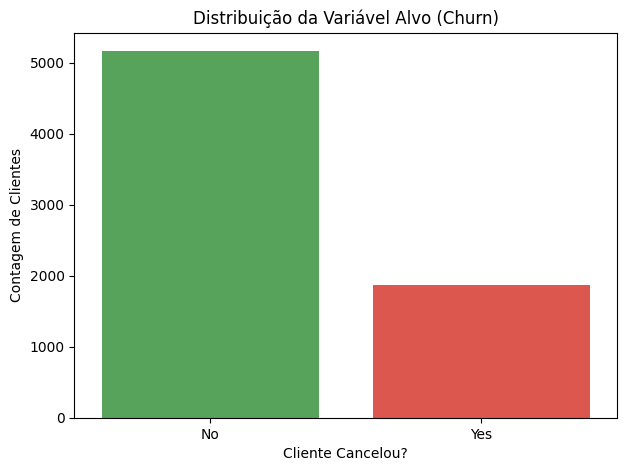

In [3]:
print("Proporção de Churn no dataset (%):")
print(df['Churn'].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Churn', palette=['#4CAF50', '#F44336'])
plt.title('Distribuição da Variável Alvo (Churn)')
plt.xlabel('Cliente Cancelou?')
plt.ylabel('Contagem de Clientes')
plt.show()

##Preparação dos Dados para Modelagem (Encoding)


In [5]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('Churn', axis=1)
y_text = df['Churn']

le = LabelEncoder()
y = le.fit_transform(y_text)

X_encoded = pd.get_dummies(X, drop_first=True)

print("Shape original de X:", X.shape)
print("Shape de X após o One-Hot Encoding:", X_encoded.shape)
print("\nExemplo das features codificadas:")
display(X_encoded.head())

Shape original de X: (7032, 20)
Shape de X após o One-Hot Encoding: (7032, 31)

Exemplo das features codificadas:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


##Divisão e Padronização

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dados divididos em treino ({X_train.shape[0]} amostras) e teste ({X_test.shape[0]} amostras).")

colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
colunas_numericas.remove('customer.SeniorCitizen')

scaler = StandardScaler()


X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])

X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

print("\nFeatures numéricas padronizadas com sucesso!")
print("Exemplo de alguns dados de treino após a padronização:")
display(X_train.head())

Dados divididos em treino (5625 amostras) e teste (1407 amostras).

Features numéricas padronizadas com sucesso!
Exemplo de alguns dados de treino após a padronização:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
1416,0,0.184279,-1.479254,-0.698974,-1.479254,True,True,False,True,False,...,True,False,True,False,False,False,False,False,False,False
6993,0,1.443383,1.155008,1.923342,1.155008,True,True,True,True,False,...,False,True,False,True,False,True,True,False,True,False
3417,1,-1.196675,0.300203,-0.919135,0.300203,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4559,0,-0.952977,0.137225,-0.744566,0.137225,True,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True
3604,0,0.955988,0.012497,0.537220,0.012497,False,True,True,True,False,...,False,True,False,False,True,False,False,False,False,False


##Análise de Correlação

/tmp/ipython-input-8-3864254248.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn_sorted.values, y=corr_churn_sorted.index, palette='coolwarm_r')


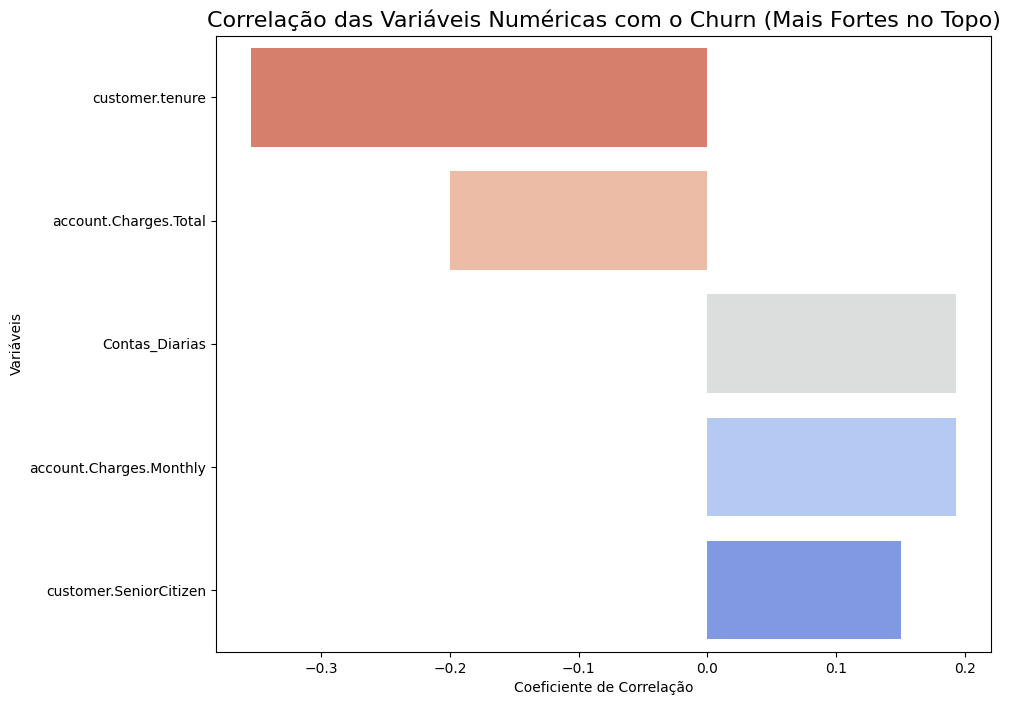

In [8]:
df_corr = df.copy()

df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

colunas_numericas = df_corr.select_dtypes(include=np.number).columns

corr_churn = df_corr[colunas_numericas].corr()['Churn'].drop('Churn')


corr_churn_sorted = corr_churn.reindex(corr_churn.abs().sort_values(ascending=False).index)


plt.figure(figsize=(10, 8))
sns.barplot(x=corr_churn_sorted.values, y=corr_churn_sorted.index, palette='coolwarm_r')
plt.title('Correlação das Variáveis Numéricas com o Churn (Mais Fortes no Topo)', fontsize=16)
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variáveis')
plt.show()

##Análises Direcionadas com Gráficos

### Tempo de Contrato (Tenure) vs. Evasão (Churn)

/tmp/ipython-input-9-3750078838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='customer.tenure', palette=['#4CAF50', '#F44336'])


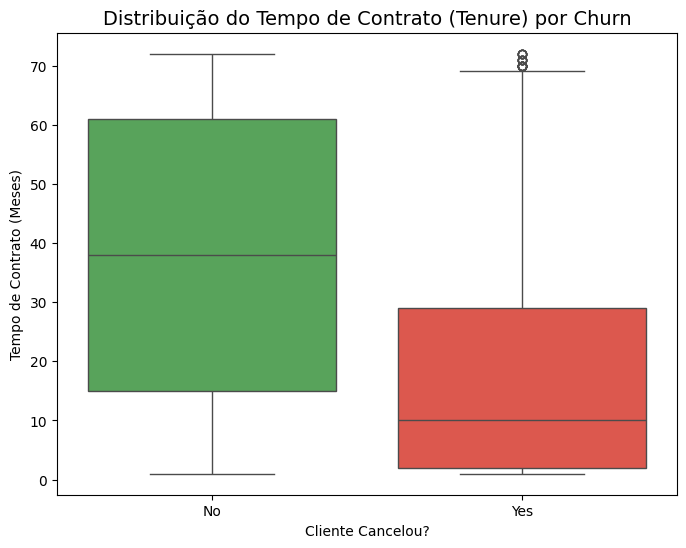

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='customer.tenure', palette=['#4CAF50', '#F44336'])
plt.title('Distribuição do Tempo de Contrato (Tenure) por Churn', fontsize=14)
plt.xlabel('Cliente Cancelou?')
plt.ylabel('Tempo de Contrato (Meses)')
plt.show()

### Total Gasto vs. Evasão (Churn)

/tmp/ipython-input-10-312965399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette=['#4CAF50', '#F44336'])


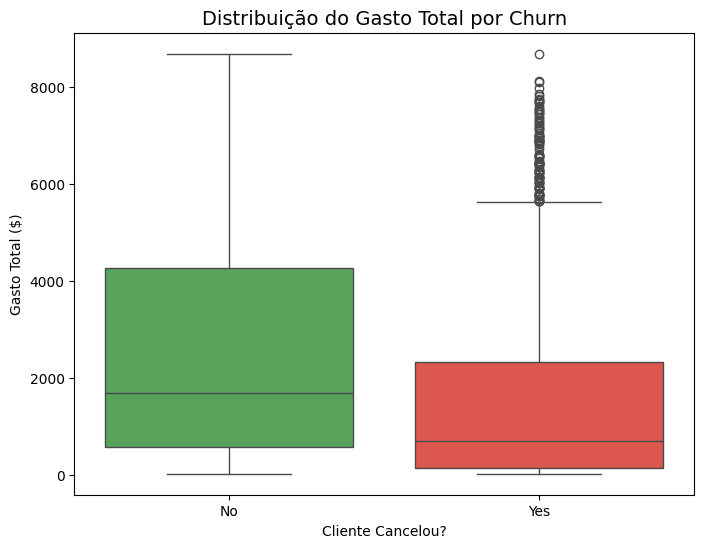

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette=['#4CAF50', '#F44336'])
plt.title('Distribuição do Gasto Total por Churn', fontsize=14)
plt.xlabel('Cliente Cancelou?')
plt.ylabel('Gasto Total ($)')
plt.show()

##Separação dos Dados e Criação dos Modelos

## Justificativa dos Modelos e da Padronização:

1. **Regressão Logística:** Escolhemos este modelo por ser um excelente ponto de partida (baseline). É um algoritmo linear, rápido e muito interpretável. Ele exige padronização porque seu mecanismo de aprendizado (baseado em gradiente descendente) é sensível à escala das variáveis. Se uma variável tiver uma escala muito maior que outra (ex: Gasto Total vs. Meses de Contrato), o modelo pode atribuir um peso indevido a ela. A padronização garante que todas as variáveis contribuam de forma justa.

2. **Random Forest:** Este é um modelo baseado em árvores de decisão. É mais complexo e poderoso, capaz de capturar relações não-lineares nos dados. Ele não exige padronização, pois suas decisões são baseadas em divisões de valores (ex: "tenure < 10.5"), não em distâncias. No entanto, treiná-lo com os dados já padronizados não prejudica sua performance.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=42, stratify=y)

print("--- 1. Separação de Dados ---")
print(f"Formato dos dados de treino (X_train): {X_train.shape}")
print(f"Formato dos dados de teste (X_test):  {X_test.shape}")

colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
if 'customer.SeniorCitizen' in colunas_numericas:
    colunas_numericas.remove('customer.SeniorCitizen')


scaler = StandardScaler()


X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])


X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])
print("\n--- 2. Padronização ---")
print("Dados numéricos padronizados com sucesso.")


print("\n--- 3. Criação e Treinamento ---")

log_reg_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)
print("Modelo de Regressão Logística treinado.")

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
print("Modelo de Random Forest treinado.")

--- 1. Separação de Dados ---
Formato dos dados de treino (X_train): (5625, 31)
Formato dos dados de teste (X_test):  (1407, 31)

--- 2. Padronização ---
Dados numéricos padronizados com sucesso.

--- 3. Criação e Treinamento ---
Modelo de Regressão Logística treinado.
Modelo de Random Forest treinado.


##Avaliação e Análise Crítica dos Modelos

AVALIAÇÃO DO MODELO DE REGRESSÃO LOGÍSTICA

--- Performance nos Dados de TREINO ---
Acurácia: 0.7527
              precision    recall  f1-score   support

   Não Churn       0.91      0.73      0.81      4130
       Churn       0.52      0.81      0.63      1495

    accuracy                           0.75      5625
   macro avg       0.72      0.77      0.72      5625
weighted avg       0.81      0.75      0.77      5625


--- Performance nos Dados de TESTE ---
Acurácia: 0.7448
Relatório de Classificação (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

   Não Churn       0.91      0.73      0.81      1033
       Churn       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.74      0.76      1407


Matriz de Confusão (Dados de Teste):


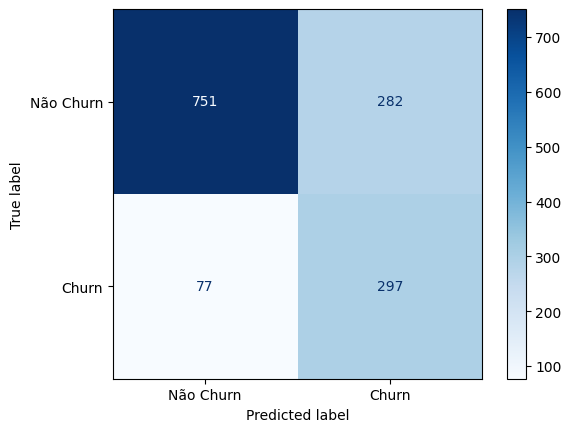



AVALIAÇÃO DO MODELO RANDOM FOREST

--- Performance nos Dados de TREINO ---
Acurácia: 0.9977
              precision    recall  f1-score   support

   Não Churn       1.00      1.00      1.00      4130
       Churn       0.99      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


--- Performance nos Dados de TESTE ---
Acurácia: 0.7896
Relatório de Classificação (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

   Não Churn       0.82      0.91      0.86      1033
       Churn       0.65      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407


Matriz de Confusão (Dados de Teste):


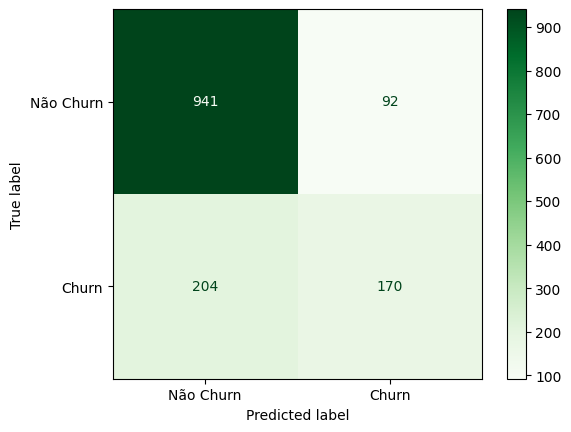

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

y_pred_train_lr = log_reg_model.predict(X_train)
y_pred_test_lr = log_reg_model.predict(X_test)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)


print("="*60)
print("AVALIAÇÃO DO MODELO DE REGRESSÃO LOGÍSTICA")
print("="*60)

print("\n--- Performance nos Dados de TREINO ---")
print(f"Acurácia: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print(classification_report(y_train, y_pred_train_lr, target_names=['Não Churn', 'Churn']))

print("\n--- Performance nos Dados de TESTE ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_test_lr):.4f}")
print("Relatório de Classificação (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_test_lr, target_names=['Não Churn', 'Churn']))

print("\nMatriz de Confusão (Dados de Teste):")
cm_lr = confusion_matrix(y_test, y_pred_test_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Não Churn', 'Churn'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.show()

print("\n\n" + "="*60)
print("AVALIAÇÃO DO MODELO RANDOM FOREST")
print("="*60)

print("\n--- Performance nos Dados de TREINO ---")
print(f"Acurácia: {accuracy_score(y_train, y_pred_train_rf):.4f}")
print(classification_report(y_train, y_pred_train_rf, target_names=['Não Churn', 'Churn']))

print("\n--- Performance nos Dados de TESTE ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_test_rf):.4f}")
print("Relatório de Classificação (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_test_rf, target_names=['Não Churn', 'Churn']))

print("\nMatriz de Confusão (Dados de Teste):")
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Não Churn', 'Churn'])
disp_rf.plot(cmap=plt.cm.Greens)
plt.show()

##Análise de Importância das Variáveis (Feature Importance)

###Importância na Regressão Logística (Análise dos Coeficientes)

/tmp/ipython-input-13-1216242211.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coeficientes['Coeficiente'], y=top_coeficientes.index, palette='vlag')


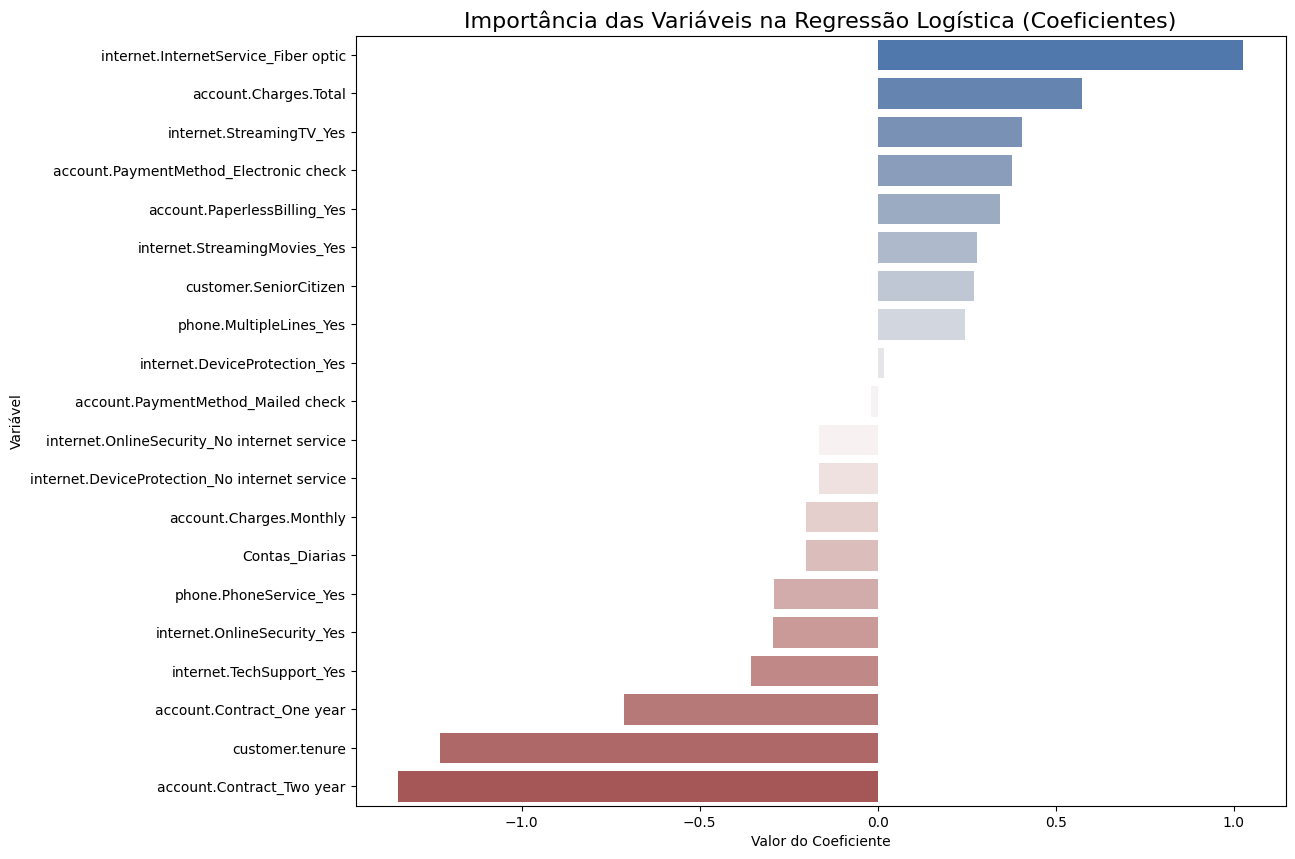

In [13]:
coeficientes = pd.DataFrame(log_reg_model.coef_[0], index=X_train.columns, columns=['Coeficiente'])

coeficientes_sorted = coeficientes.sort_values(by='Coeficiente', ascending=False)


top_positivos = coeficientes_sorted.head(10)
top_negativos = coeficientes_sorted.tail(10)
top_coeficientes = pd.concat([top_positivos, top_negativos])


plt.figure(figsize=(12, 10))
sns.barplot(x=top_coeficientes['Coeficiente'], y=top_coeficientes.index, palette='vlag')
plt.title('Importância das Variáveis na Regressão Logística (Coeficientes)', fontsize=16)
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Variável')
plt.show()

 ### Importância no Random Forest

/tmp/ipython-input-14-2360567351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df.head(20), palette='viridis')


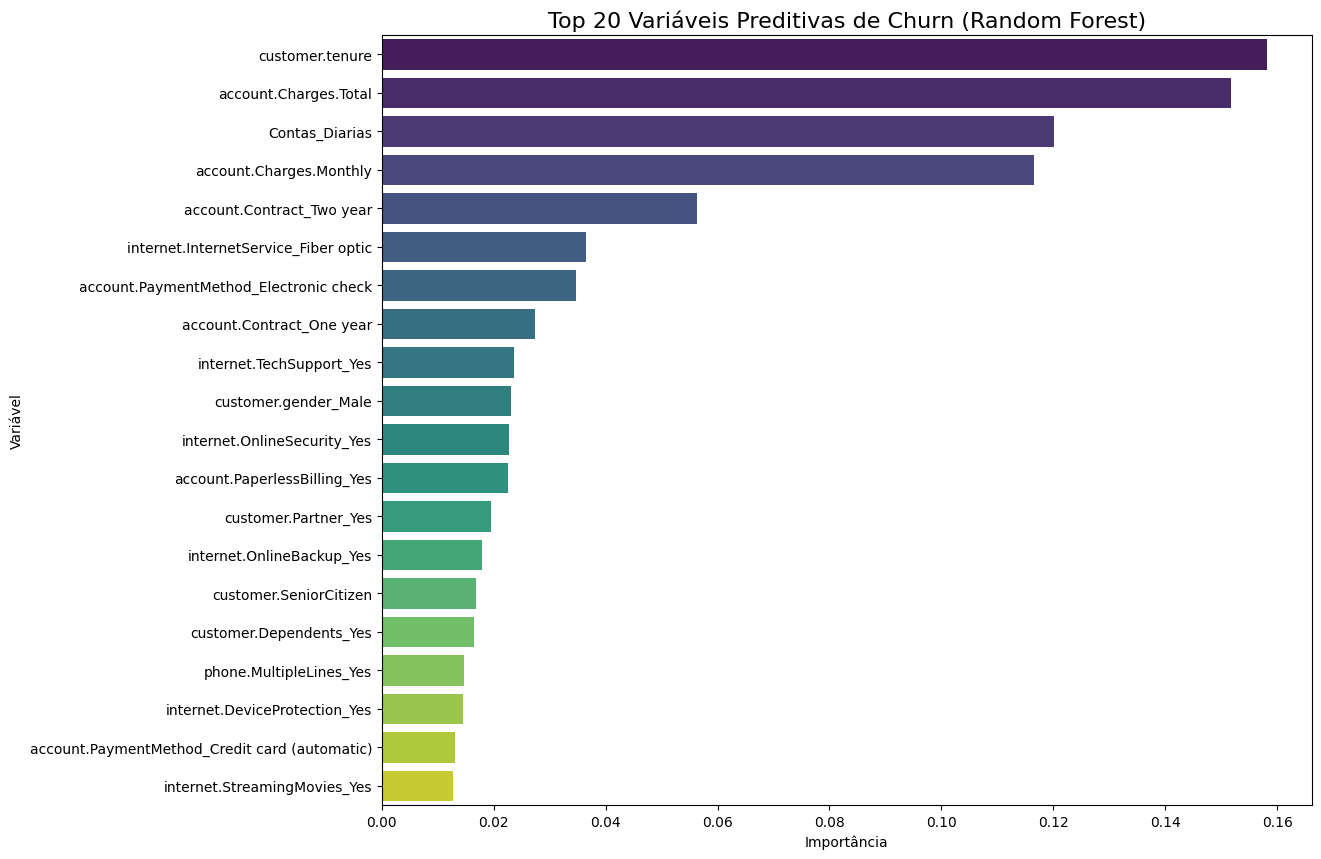

In [14]:
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(20), palette='viridis')
plt.title('Top 20 Variáveis Preditivas de Churn (Random Forest)', fontsize=16)
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

# 📄 Relatório Final: Análise Preditiva de Evasão de Clientes (Churn) | Telecom X

## 1. Resumo do Projeto e Objetivos
O presente projeto teve como objetivo desenvolver modelos de Machine Learning capazes de prever a probabilidade de um cliente cancelar seu serviço (churn) na Telecom X. A partir da identificação dos principais fatores de risco, o objetivo final é propor estratégias de retenção para mitigar a perda de receita e aumentar a fidelização.


---


## 2. Metodologia
Foram testados dois modelos de classificação: Regressão Logística e Random Forest. Os dados foram previamente tratados, codificados e padronizados para garantir a melhor performance dos algoritmos. A avaliação foi realizada com base em métricas como Acurácia, Precisão, Recall, F1-Score e Matriz de Confusão, com foco especial no Recall da classe "Churn", que mede a capacidade do modelo de identificar os clientes que de fato cancelarão.


---


## 3. Análise de Desempenho dos Modelos
Após a avaliação, o modelo de Regressão Logística foi selecionado como o mais adequado para o problema de negócio. Embora o Random Forest tenha apresentado uma acurácia geral ligeiramente superior (79% vs 74%), a Regressão Logística demonstrou uma capacidade muito maior de identificar os clientes em risco de evasão, com um Recall de 79% para a classe "Churn", contra apenas 45% do Random Forest. Para uma campanha de retenção, é mais vantajoso identificar o máximo de churners possível, mesmo que isso resulte em alguns contatos desnecessários.


---


## 4. Fatores que Mais Influenciam a Evasão
A análise de importância de variáveis de ambos os modelos revelou, com alta consistência, os seguintes fatores como os principais preditores de churn:

* **Fator Principal (Retenção)**: **Tempo de Contrato** `(tenure)`: É a variável de maior impacto. Quanto mais tempo um cliente está na base, menor a sua chance de cancelar. Clientes novos são o grupo de maior risco.

* **Fator Principal (Risco)**: **Contrato Mensal** `(account.Contract_Month-to-month)`: Ter um contrato sem fidelidade anual é o maior indicador de risco de evasão.

* **Fator de Risco Secundário**: **Cobranças Mensais** `(account.Charges.Monthly)`: Clientes com faturas mensais mais altas tendem a cancelar mais.

* Outros Fatores de Risco Relevantes:

 * **Pagamento com Cheque Eletrônico** `(account.PaymentMethod_Electronic check)`: Este método de pagamento está associado a um maior risco de churn.

 * **Serviço de Fibra Ótica** `(internet.InternetService_Fiber optic)`: Indica um possível problema de satisfação (preço ou qualidade) com este serviço específico.

 * **Falta de Suporte Técnico** `(internet.TechSupport_No)`: Clientes sem acesso a suporte técnico dedicado são mais propensos a cancelar.


---


## 5. Propostas e Estratégias de Retenção
Com base nos fatores identificados, recomendamos as seguintes estratégias de negócio para a Telecom X:


1. **Programa de Retenção para Novos Clientes:** Criar uma jornada de acompanhamento focada nos clientes com menos de 12 meses de contrato. Oferecer um canal de suporte proativo e verificar a satisfação nos primeiros meses, período mais crítico para o churn.

2. **Campanhas de Fidelização de Contrato:** Lançar campanhas direcionadas para clientes com contrato mensal, oferecendo descontos ou benefícios claros para a migração para planos anuais ou de dois anos.

3. **Incentivo a Pagamentos Automáticos:** Para clientes que utilizam cheque eletrônico, oferecer um pequeno desconto ou bônus para a mudança para pagamento via cartão de crédito ou débito automático, o que aumenta a conveniência e reduz o churn por esquecimento ou atrito.

4. **Revisão do Pacote de Fibra Ótica:** A equipe de produtos deve investigar a fundo a causa do alto churn entre clientes de fibra ótica. A solução pode envolver um reajuste de preço, uma melhoria na estabilidade da conexão ou a inclusão de serviços de valor agregado, como o suporte técnico, que foi identificado como um fator de retenção.

Com a implementação destas estratégias, a Telecom X poderá utilizar os insights gerados por dados para agir de forma proativa, reduzindo a taxa de churn e fortalecendo sua base de clientes.